# "2020 February Portfolio BackTest"
> "2020 February portfolio"
- toc: false
- branch: master
- badges: false
- comments: true
- categories: [long, short, longshort]
- hide: false
- search_exclude: true
- metadata_key1: metadata_value1
- metadata_key2: metadata_value2

In [32]:
#hide_input
import numpy as np
import pandas as pd
import seaborn as sns
import os
import time
import gc
import glob
import matplotlib.pyplot as plt

In [33]:
#hide_input
df_testp=pd.read_csv('D:\\Downloads\\20204dayreturnpred2019train60K.csv')

In [34]:
#hide_input
df_testp=df_testp[['Company Name','Date', 'Ticker', 'label',  'pred', 'prof0.0', 'prof-1.0',
       'prof1.0', 'return1&2', 'return1&2&3', 'return1&2&3&4', 'return2',
       'return1', 'return3', 'return4', 'cumulative_return1',
       'cumulative_return1&2', 'cumulative_return1&2&3',
       'cumulative_return1&2&3&4']].copy()

In [35]:
#hide
import datetime
datetoday=f"{datetime.datetime.now():%Y%m%d}"
dateyesterday=int(datetoday)-6;dateyesterday

20200423

In [36]:
#hide
df_testp=df_testp.loc[df_testp.Date>=20200201].loc[df_testp.Date<=20200301].copy().reset_index()

**Long-Short Portfolio**

In [37]:
#hide
#df_testp=df_testp.loc[df_testp.Date>=20200201].copy().reset_index()
df_testp['indexx']=range(len(df_testp))

In [38]:
#hide
df_testp['cumulative_return1']=0.0
df_testp['cumulative_return1&2']=0.0
df_testp['cumulative_return1&2&3']=0.0
df_testp['cumulative_return1&2&3&4']=0.0
for l in range(len(df_testp)):
  df_testp['cumulative_return1'][l]=np.prod(df_testp['return1'][:l])
  df_testp['cumulative_return1&2'][l]=np.prod(df_testp['return1&2'][:l])
  df_testp['cumulative_return1&2&3'][l]=np.prod(df_testp['return1&2&3'][:l])
  df_testp['cumulative_return1&2&3&4'][l]=np.prod(df_testp['return1&2&3&4'][:l])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launc

In [39]:
#hide_input
df_testp.head()

,index,Company Name,Date,Ticker,label,pred,prof0.0,prof-1.0,prof1.0,return1&2,...,return1&2&3&4,return2,return1,return3,return4,cumulative_return1,cumulative_return1&2,cumulative_return1&2&3,cumulative_return1&2&3&4,indexx
0,58,PRIME GLOBAL CAPITAL GROUP Inc,20200203,PGCG,0.0,1.0,0.091348,0.396471,0.512181,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0
1,59,Aptiv PLC,20200203,DLPH,-1.0,1.0,0.128829,0.370849,0.500321,1.021625,...,0.975098,1.014974,1.006553,0.962155,0.992000,1.000000,1.000000,1.000000,1.000000,1
2,60,"FIRSTCASH, INC",20200203,FCFS,-1.0,1.0,0.117064,0.307574,0.575362,0.991567,...,0.981400,1.007158,0.984519,0.996388,0.993335,1.006553,1.021625,0.982962,0.975098,2
3,61,SPHERIX INC,20200203,SPEX,1.0,1.0,0.085428,0.414343,0.500229,1.068627,...,1.009804,1.048077,1.019608,0.935780,1.009804,0.990971,1.013009,0.971152,0.956962,3
4,62,MOBILE MINI INC,20200203,MINI,0.0,1.0,0.156700,0.331351,0.511949,1.020350,...,1.003549,1.011257,1.008992,0.997681,0.985821,1.010402,1.082530,0.971152,0.966344,4


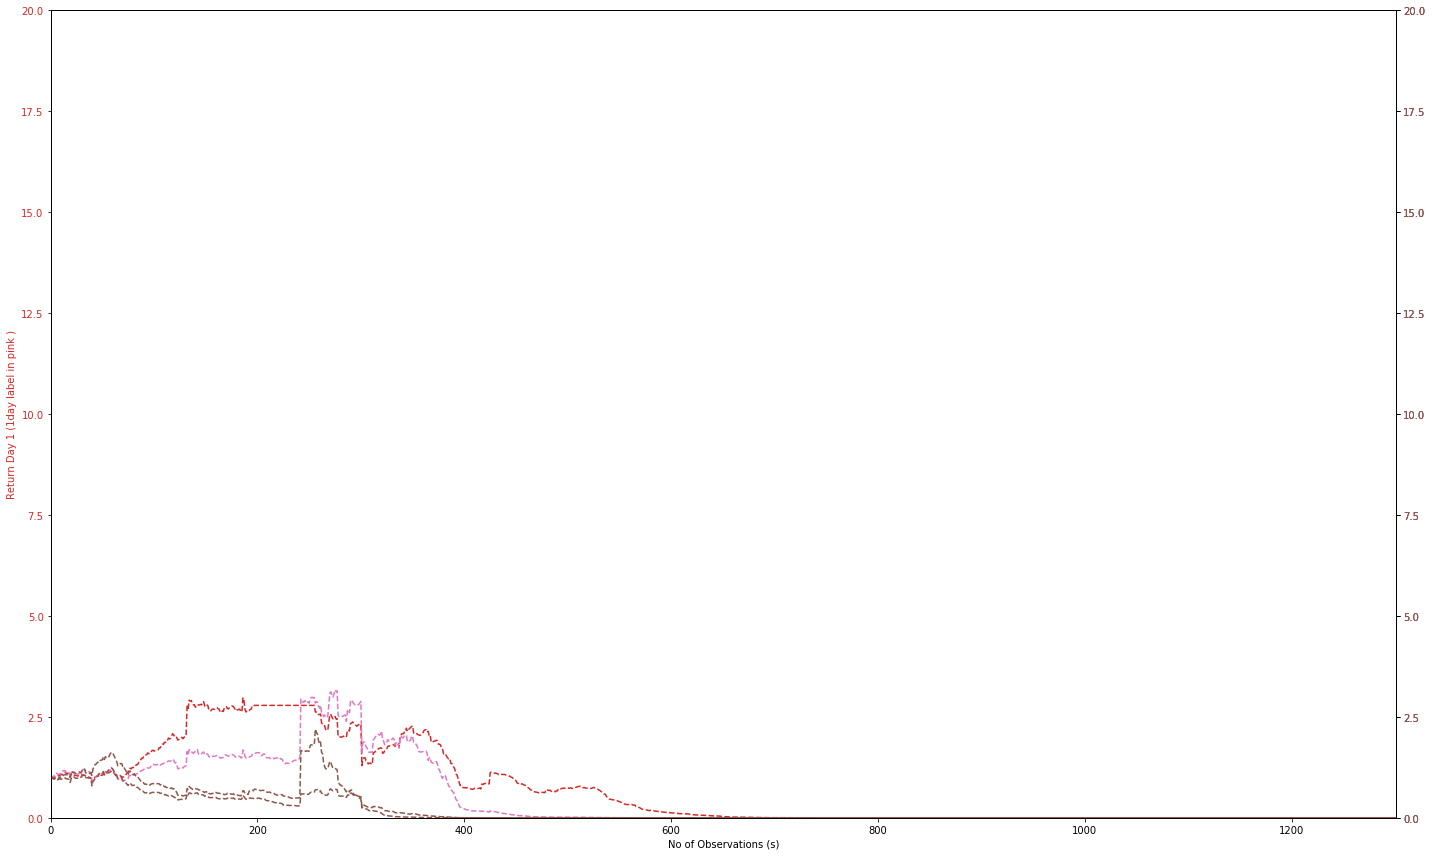

In [40]:
#hide_input
fig, a1 = plt.subplots(figsize=(20, 12))

color = 'tab:red'
a1.set_xlabel('No of Observations (s)')
a1.set_ylabel('Return Day 1 (1day label in pink )', color=color)
a1.plot(df_testp['indexx'], df_testp['cumulative_return1'], color=color,linestyle='--')
a1.tick_params(axis='y', labelcolor=color)


a2 = a1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:pink'
#a2.set_ylabel('Volume', color=color)  # we already handled the x-label with ax1
a2.plot(df_testp['indexx'], df_testp['cumulative_return1&2'], color=color,linestyle='--')
a2.tick_params(axis='y', labelcolor=color)

a3 = a1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:brown'
#a2.set_ylabel('Volume', color=color)  # we already handled the x-label with ax1
a3.plot(df_testp['indexx'], df_testp['cumulative_return1&2&3'], color=color,linestyle='--')
a3.tick_params(axis='y', labelcolor=color)

a4 = a1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:brown'
#a2.set_ylabel('Volume', color=color)  # we already handled the x-label with ax1
a4.plot(df_testp['indexx'], df_testp['cumulative_return1&2&3&4'], color=color,linestyle='--')
a4.tick_params(axis='y', labelcolor=color)

a,b = 0,20
a1.set_ylim(a,b)
a2.set_ylim(a,b)
a3.set_ylim(a,b)
a4.set_ylim(a,b)

x,y =df_testp['indexx'].min(),df_testp['indexx'].max()
a1.set_xlim(x,y)
a2.set_xlim(x,y)
a3.set_xlim(x,y)
a4.set_xlim(x,y)


fig.tight_layout()

**Long portfolio**

In [41]:
#hide_input
df_long=df_testp.copy()
df_long=df_long.loc[df_long.pred==1.0].sort_values(by='prof1.0',ascending=False).reset_index()


In [42]:
#hide_input
df_long['indexx']=range(len(df_long))

In [43]:
#hide
df_long['cumulative_return1']=0.0
df_long['cumulative_return1&2']=0.0
df_long['cumulative_return1&2&3']=0.0
df_long['cumulative_return1&2&3&4']=0.0
for l in range(len(df_long)):
  df_long['cumulative_return1'][l]=np.prod(df_long['return1'][:l])
  df_long['cumulative_return1&2'][l]=np.prod(df_long['return1&2'][:l])
  df_long['cumulative_return1&2&3'][l]=np.prod(df_long['return1&2&3'][:l])
  df_long['cumulative_return1&2&3&4'][l]=np.prod(df_long['return1&2&3&4'][:l])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launc

In [44]:
#hide_input
df_long.head()

,level_0,index,Company Name,Date,Ticker,label,pred,prof0.0,prof-1.0,prof1.0,...,return1&2&3&4,return2,return1,return3,return4,cumulative_return1,cumulative_return1&2,cumulative_return1&2&3,cumulative_return1&2&3&4,indexx
0,839,897,Eaton Corp plc,20200226,ETN,-1.0,1.0,0.119170,0.230700,0.650131,...,0.961379,0.972973,0.965417,1.054674,0.970422,1.000000,1.000000,1.000000,1.000000,0
1,1085,1143,Bank of New York Mellon Corp,20200227,BK,-1.0,1.0,0.122249,0.236966,0.640785,...,0.988770,1.026566,0.974121,0.947998,1.043008,0.965417,0.939325,0.990681,0.961379,1
2,244,302,Mastercard Inc,20200214,MA,1.0,1.0,0.134771,0.227264,0.637965,...,1.010265,1.000851,1.000000,1.009729,0.999681,0.940433,0.939325,0.939164,0.950582,2
3,628,686,REGIONS FINANCIAL CORP,20200221,RF,-1.0,1.0,0.134771,0.227264,0.637965,...,0.848132,0.940242,0.963258,0.985801,0.949931,0.940433,0.940124,0.949108,0.960341,3
4,956,1014,INDEPENDENT BANK CORP,20200227,INDB,-1.0,1.0,0.143175,0.220313,0.636512,...,0.980658,1.058641,0.953410,0.973143,0.998419,0.905880,0.851466,0.847397,0.814496,4


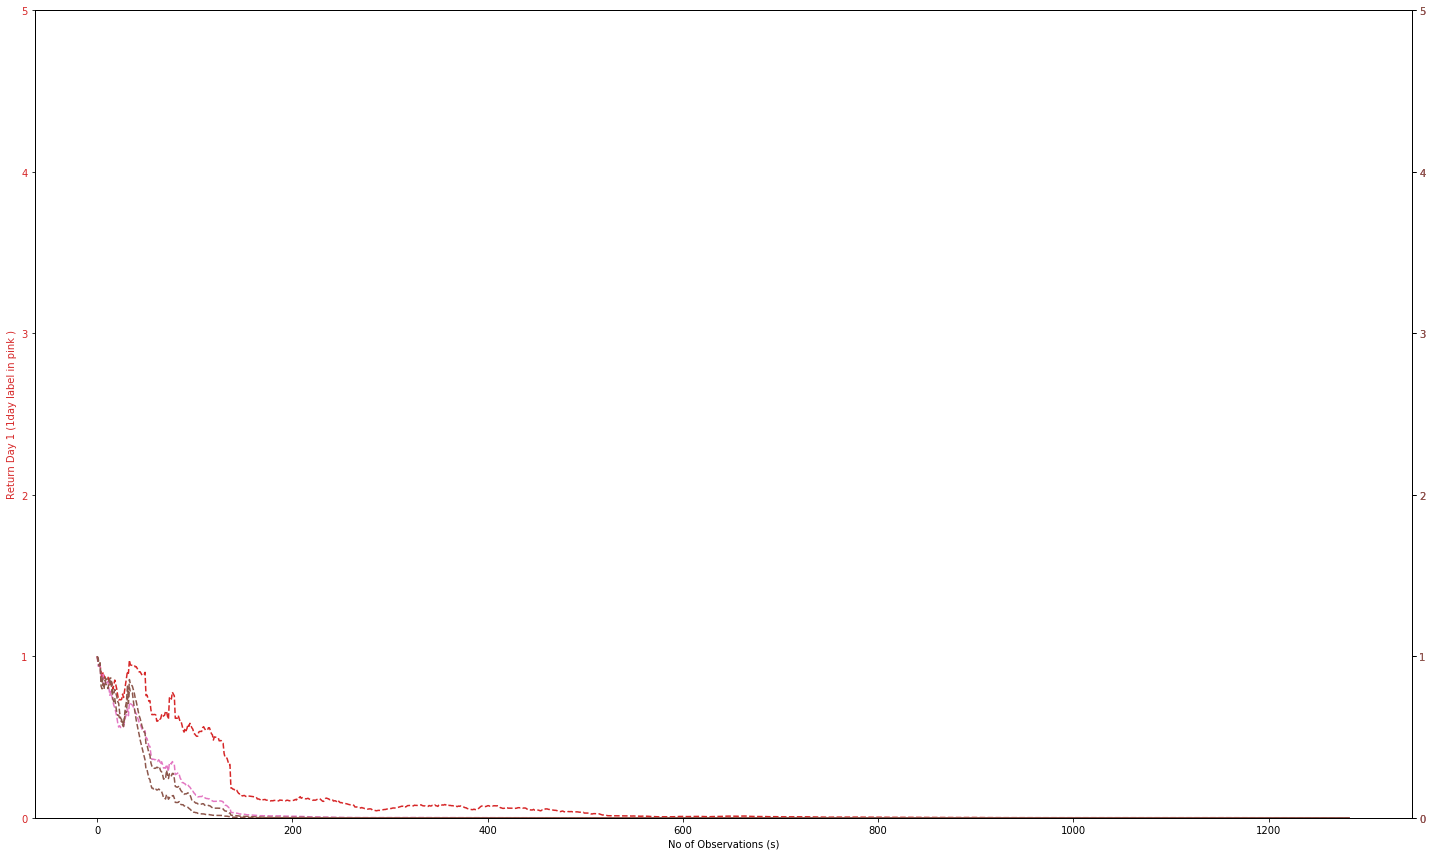

In [45]:
#hide_input
fig, a1 = plt.subplots(figsize=(20, 12))

color = 'tab:red'
a1.set_xlabel('No of Observations (s)')
a1.set_ylabel('Return Day 1 (1day label in pink )', color=color)
a1.plot(df_long['indexx'], df_long['cumulative_return1'], color=color,linestyle='--')
a1.tick_params(axis='y', labelcolor=color)


a2 = a1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:pink'
#a2.set_ylabel('Volume', color=color)  # we already handled the x-label with ax1
a2.plot(df_long['indexx'], df_long['cumulative_return1&2'], color=color,linestyle='--')
a2.tick_params(axis='y', labelcolor=color)

a3 = a1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:brown'
#a2.set_ylabel('Volume', color=color)  # we already handled the x-label with ax1
a3.plot(df_long['indexx'], df_long['cumulative_return1&2&3'], color=color,linestyle='--')
a3.tick_params(axis='y', labelcolor=color)

a4 = a1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:brown'
#a2.set_ylabel('Volume', color=color)  # we already handled the x-label with ax1
a4.plot(df_long['indexx'], df_long['cumulative_return1&2&3&4'], color=color,linestyle='--')
a4.tick_params(axis='y', labelcolor=color)

a,b = 0,5
a1.set_ylim(a,b)
a2.set_ylim(a,b)
a3.set_ylim(a,b)
a4.set_ylim(a,b)


fig.tight_layout()

**Short Portfolio**

In [46]:
#hide_input
df_short=df_testp.copy()
df_short=df_short.loc[df_short.pred==-1.0].sort_values(by='prof-1.0',ascending=False).reset_index()

In [47]:
#hide_input
df_short['indexx']=range(len(df_short))

In [48]:
#hide
df_short['cumulative_return1']=0.0
df_short['cumulative_return1&2']=0.0
df_short['cumulative_return1&2&3']=0.0
df_short['cumulative_return1&2&3&4']=0.0
for l in range(len(df_short)):
  df_short['cumulative_return1'][l]=np.prod(df_short['return1'][:l])
  df_short['cumulative_return1&2'][l]=np.prod(df_short['return1&2'][:l])
  df_short['cumulative_return1&2&3'][l]=np.prod(df_short['return1&2&3'][:l])
  df_short['cumulative_return1&2&3&4'][l]=np.prod(df_short['return1&2&3&4'][:l])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launc

In [49]:
#hide_input
df_short.head()

,level_0,index,Company Name,Date,Ticker,label,pred,prof0.0,prof-1.0,prof1.0,...,return1&2&3&4,return2,return1,return3,return4,cumulative_return1,cumulative_return1&2,cumulative_return1&2&3,cumulative_return1&2&3&4,indexx
0,864,922,Karyopharm Therapeutics Inc.,20200226,KPTI,1.0,-1.0,0.076049,0.523512,0.400439,...,0.293948,0.937581,0.930459,0.303550,1.110029,1.000000,1.000000,1.000000,1.000000,0
1,1293,1351,"SANGAMO THERAPEUTICS, INC",20200228,SGMO,0.0,-1.0,0.098796,0.519092,0.382112,...,0.996493,1.029412,1.003517,1.014545,0.950800,0.930459,0.872381,0.264811,0.293948,1
2,351,409,"AGIOS PHARMACEUTICALS, INC.",20200219,AGIO,-1.0,-1.0,0.087434,0.492452,0.420114,...,1.126446,1.010618,0.987934,1.064771,1.059593,0.933731,0.901198,0.277537,0.292917,2
3,51,109,"REGENERON PHARMACEUTICALS, INC.",20200207,REGN,1.0,-1.0,0.119242,0.491665,0.389093,...,0.955808,0.972709,0.988635,0.975929,1.018435,0.922465,0.899777,0.295048,0.329955,3
4,615,673,"Ampio Pharmaceuticals, Inc.",20200221,AMPE,-1.0,-1.0,0.081775,0.485054,0.433171,...,1.088428,1.031250,1.015385,0.951613,1.092308,0.911981,0.865275,0.276904,0.315374,4


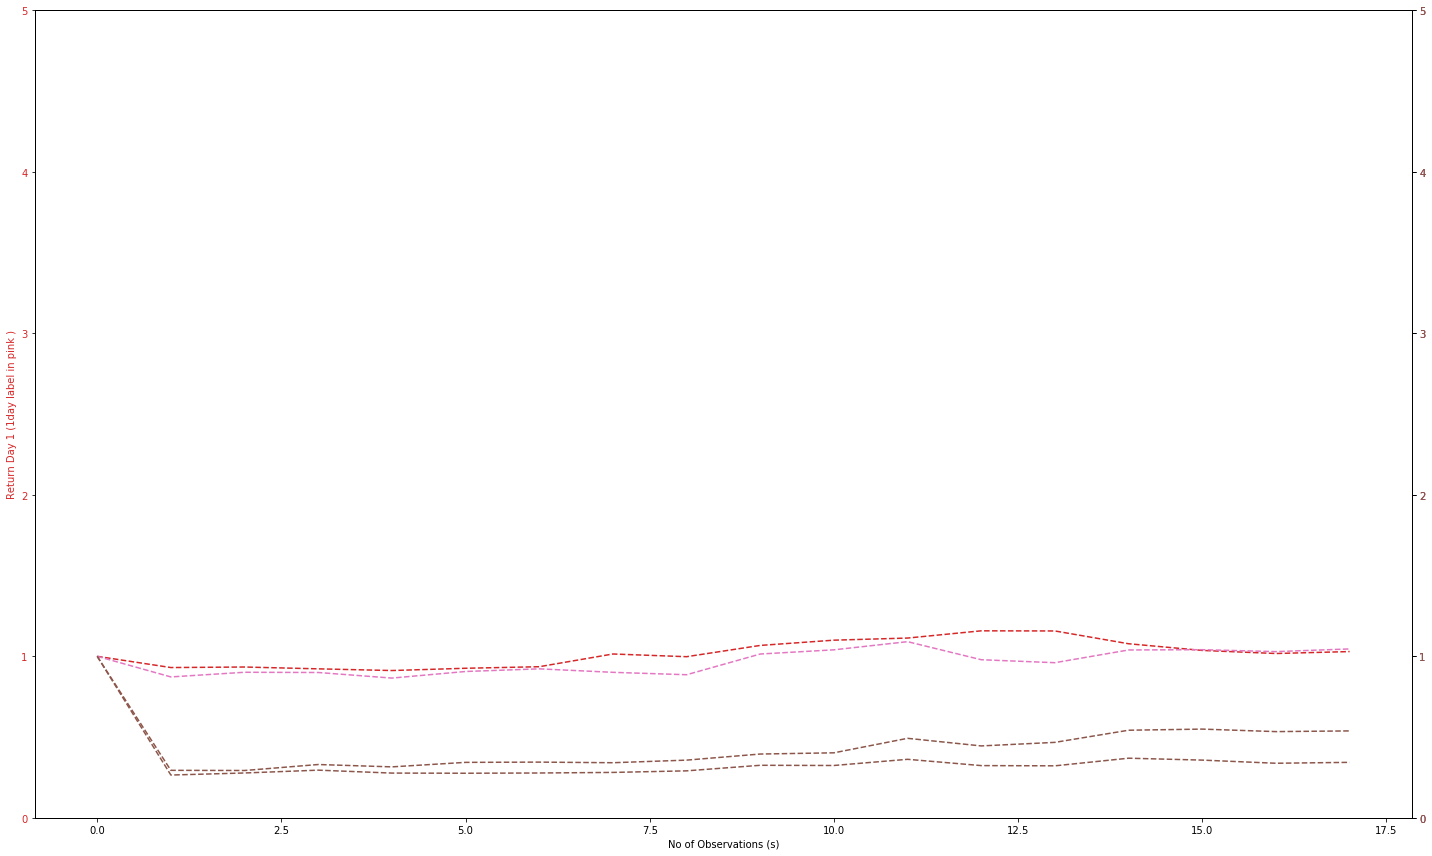

In [50]:
#hide_input
fig, a1 = plt.subplots(figsize=(20, 12))

color = 'tab:red'
a1.set_xlabel('No of Observations (s)')
a1.set_ylabel('Return Day 1 (1day label in pink )', color=color)
a1.plot(df_short['indexx'], df_short['cumulative_return1'], color=color,linestyle='--')
a1.tick_params(axis='y', labelcolor=color)


a2 = a1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:pink'
#a2.set_ylabel('Volume', color=color)  # we already handled the x-label with ax1
a2.plot(df_short['indexx'], df_short['cumulative_return1&2'], color=color,linestyle='--')
a2.tick_params(axis='y', labelcolor=color)

a3 = a1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:brown'
#a2.set_ylabel('Volume', color=color)  # we already handled the x-label with ax1
a3.plot(df_short['indexx'], df_short['cumulative_return1&2&3'], color=color,linestyle='--')
a3.tick_params(axis='y', labelcolor=color)

a4 = a1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:brown'
#a2.set_ylabel('Volume', color=color)  # we already handled the x-label with ax1
a4.plot(df_short['indexx'], df_short['cumulative_return1&2&3&4'], color=color,linestyle='--')
a4.tick_params(axis='y', labelcolor=color)

a,b = 0,5
a1.set_ylim(a,b)
a2.set_ylim(a,b)
a3.set_ylim(a,b)
a4.set_ylim(a,b)


fig.tight_layout()